In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv("D:/Major Project/Dataset/Dynamics/A1237_30deg.csv")

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23790 entries, 0 to 23789
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Current(A)      23790 non-null  float64
 1   Voltage(V)      23790 non-null  float64
 2   Temperature(C)  23790 non-null  float64
 3   OCV             23790 non-null  float64
 4   SOC             23790 non-null  float64
dtypes: float64(5)
memory usage: 929.4 KB


In [5]:
data.head()

,Current(A),Voltage(V),Temperature(C),OCV,SOC
0,0.000000,3.075400,31.391201,3.075400,56.0
1,-1.099373,2.888580,31.242373,2.877586,40.0
2,-1.099373,2.876269,31.391201,2.865275,39.0
3,-1.099373,2.864882,31.421654,2.853888,38.0
4,-1.099373,2.853494,31.496058,2.842500,37.0


In [39]:
data.drop(columns='OCV').corr()

,Current(A),Voltage(V),Temperature(C),SOC
Current(A),1.000000,0.816666,0.139479,0.831983
Voltage(V),0.816666,1.000000,-0.017014,0.999472
Temperature(C),0.139479,-0.017014,1.000000,-0.009911
SOC,0.831983,0.999472,-0.009911,1.000000


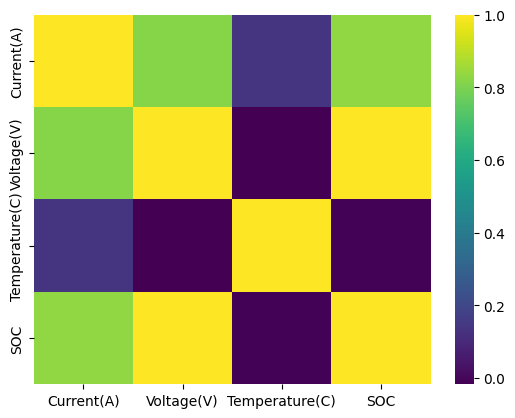

In [6]:
sns.heatmap((data.drop(columns='OCV')).corr(),annot=False,cmap='viridis')
plt.show()

In [7]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
y = data.iloc[:,-1] 
# Create bins for the target variable using np.digitize()
y_bins = np.digitize(y, bins, right=True)  
# Display the counts in each bin
unique_bins, bin_counts = np.unique(y_bins, return_counts=True)
for bin_num, count in zip(unique_bins, bin_counts):
    print(f"Bin {bin_num}: {count} samples")

Bin 0: 3 samples
Bin 1: 129 samples
Bin 2: 297 samples
Bin 3: 507 samples
Bin 4: 911 samples
Bin 5: 1475 samples
Bin 6: 3727 samples
Bin 7: 6880 samples
Bin 8: 6568 samples
Bin 9: 1501 samples
Bin 10: 1792 samples


In [8]:
# Separate data into charge, discharge, and ideal profiles
charge_data = data[data['Current(A)'] > 0]
discharge_data = data[data['Current(A)'] < 0]
ideal_data = data[data['Current(A)'] == 0]

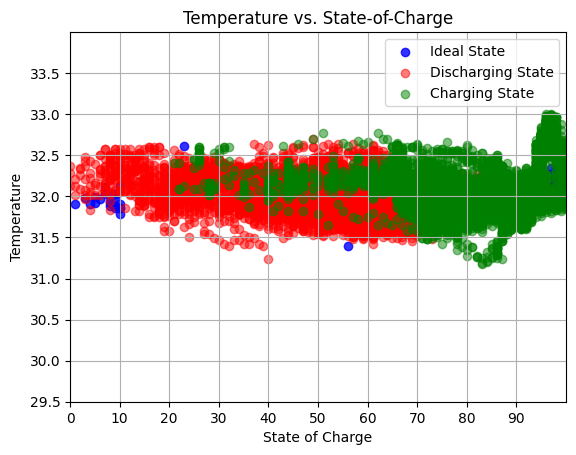

In [9]:
plt.scatter(ideal_data['SOC'], ideal_data['Temperature(C)'],label='Ideal State',alpha=0.8,color = 'blue')
plt.scatter(discharge_data['SOC'], discharge_data['Temperature(C)'],label='Discharging State',alpha=0.5,color = 'red')
plt.scatter(charge_data['SOC'], charge_data['Temperature(C)'],label='Charging State',alpha=0.5,color = 'green')
plt.xlabel('State of Charge')
plt.ylabel('Temperature')
plt.title(f'Temperature vs. State-of-Charge')
plt.legend()
# Set x-axis limits
plt.xlim(0, 100)
# Set x-axis ticks every 0.2
plt.xticks(np.arange(0, 100, 10))
# Set y-axis limits
plt.ylim(29.5, 34.0)
# Set y-axis ticks every 0.5
plt.yticks(np.arange(29.5, 34.0, 0.5))
# Add major grid lines
plt.grid(True, which='major')
# Add minor grid lines
plt.grid(True, which='minor', linestyle='--', alpha=0.5)
plt.show()

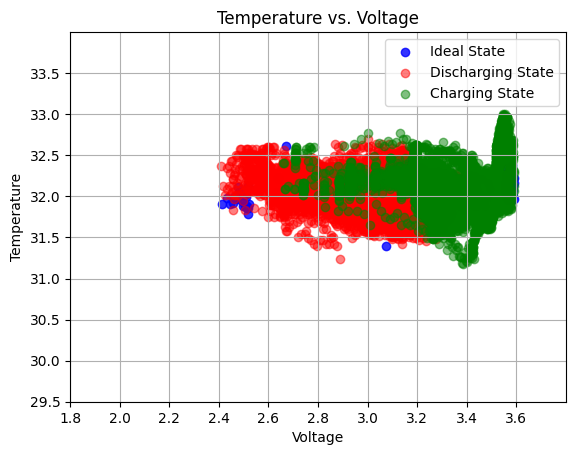

In [10]:
plt.scatter(ideal_data['Voltage(V)'], ideal_data['Temperature(C)'],label='Ideal State',alpha=0.8,color = 'blue')
plt.scatter(discharge_data['Voltage(V)'], discharge_data['Temperature(C)'],label='Discharging State',alpha=0.5,color = 'red')
plt.scatter(charge_data['Voltage(V)'], charge_data['Temperature(C)'],label='Charging State',alpha=0.5,color = 'green')
plt.xlabel('Voltage')
plt.ylabel('Temperature')
plt.title(f'Temperature vs. Voltage')
plt.legend()
# Set x-axis limits
plt.xlim(1.8, 3.8)
# Set x-axis ticks every 0.2
plt.xticks(np.arange(1.8, 3.8, 0.2))
# Set y-axis limits
plt.ylim(29.5, 34.0)
# Set y-axis ticks every 0.5
plt.yticks(np.arange(29.5, 34.0, 0.5))
plt.grid(True, which='major')
plt.grid(True, which='minor', linestyle='--', alpha=0.5)
plt.show()

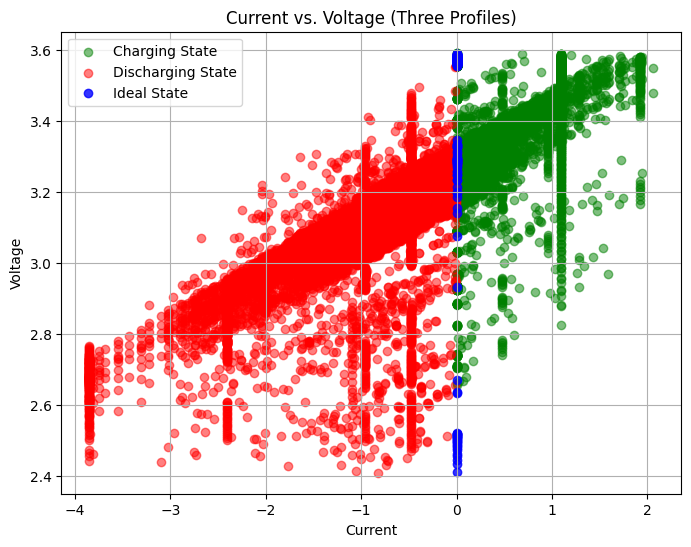

In [11]:
# Plot charge profile
plt.figure(figsize=(8, 6))
plt.scatter(charge_data['Current(A)'], charge_data['Voltage(V)'], color='green', alpha=0.5, label='Charging State')
plt.scatter(discharge_data['Current(A)'], discharge_data['Voltage(V)'], color='red', alpha=0.5, label='Discharging State')
plt.scatter(ideal_data['Current(A)'], ideal_data['Voltage(V)'], color='blue', alpha=0.8, label='Ideal State')
plt.xlabel('Current')
plt.ylabel('Voltage')
plt.title('Current vs. Voltage (Three Profiles)')
plt.grid(True)
plt.legend()
plt.show()

In [12]:
discharge_data.describe()

,Current(A),Voltage(V),Temperature(C),OCV,SOC
count,13616.000000,13616.000000,13616.000000,13616.000000,13616.000000
mean,-0.964705,3.097069,31.967100,3.087422,57.282902
std,0.761054,0.161668,0.187880,0.167311,13.944674
min,-3.849407,2.409066,31.242373,2.400807,0.000000
25%,-1.173754,3.035697,31.837551,3.023450,52.000000
50%,-0.757708,3.137263,31.942364,3.129508,61.000000
75%,-0.480657,3.207744,32.084213,3.202935,67.000000
max,-0.000185,3.555838,32.702530,3.555825,96.000000


In [13]:
charge_data.describe()

,Current(A),Voltage(V),Temperature(C),OCV,SOC
count,10038.000000,10038.000000,10038.000000,10038.000000,10038.000000
mean,0.388499,3.329328,32.025540,3.333213,77.763698
std,0.486311,0.130466,0.263613,0.133709,11.147518
min,0.000003,2.657133,31.174595,2.657169,21.000000
25%,0.000191,3.269684,31.854315,3.270549,73.000000
50%,0.105376,3.314542,31.969826,3.316358,76.000000
75%,0.862335,3.402874,32.151962,3.408114,84.000000
max,2.061073,3.592155,33.004131,3.599857,100.000000


In [14]:
ideal_data.describe()

,Current(A),Voltage(V),Temperature(C),OCV,SOC
count,136.0,136.000000,136.000000,136.000000,136.000000
mean,0.0,3.274841,32.050314,3.274841,72.911765
std,0.0,0.408800,0.168331,0.408800,34.061050
min,0.0,2.412451,31.391201,2.412451,1.000000
25%,0.0,3.211514,31.947299,3.211514,67.750000
50%,0.0,3.557992,32.030220,3.557992,96.000000
75%,0.0,3.571150,32.178829,3.571150,98.000000
max,0.0,3.589078,32.611477,3.589078,99.000000


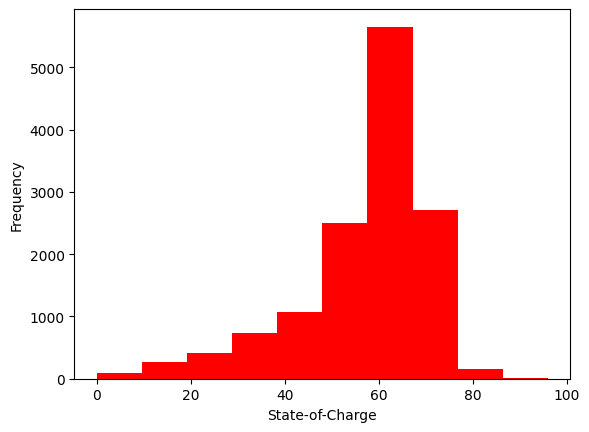

In [15]:
plt.hist(discharge_data['SOC'],color='red')
plt.xlabel('State-of-Charge')
plt.ylabel('Frequency')
plt.show()

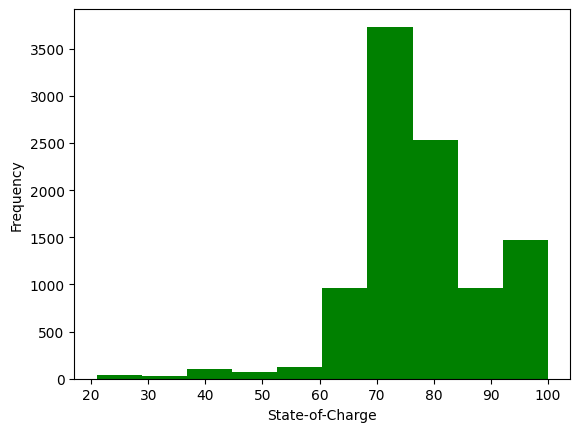

In [16]:
plt.hist(charge_data['SOC'],color='green')
plt.xlabel('State-of-Charge')
plt.ylabel('Frequency')
plt.show()

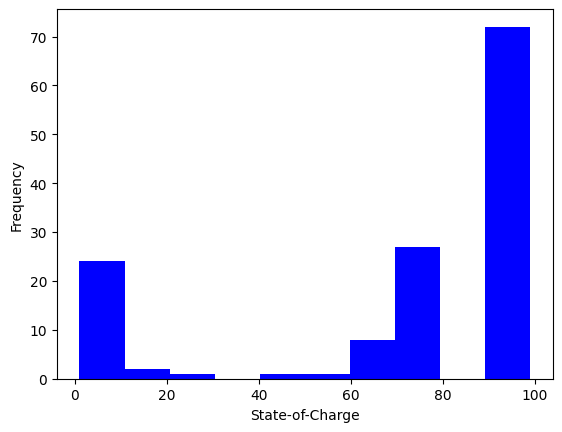

In [17]:
plt.hist(ideal_data['SOC'],color='blue')
plt.xlabel('State-of-Charge')
plt.ylabel('Frequency')
plt.show()

In [18]:
df = data.sort_values('SOC',ascending=False)
df

,Current(A),Voltage(V),Temperature(C),OCV,SOC
661,1.100129,3.588154,32.543774,3.599156,100.0
3836,1.925083,3.576767,32.019962,3.596018,100.0
18047,1.720348,3.578305,31.962503,3.595509,100.0
2763,1.925083,3.575843,32.016582,3.595094,100.0
3478,1.925083,3.579844,31.976017,3.599095,100.0
...,...,...,...,...,...
23601,-3.103718,2.439535,32.121357,2.408498,1.0
23755,-1.768990,2.426609,32.019962,2.408919,1.0
7731,-3.849219,2.443229,32.286957,2.404737,0.0
23779,-1.057298,2.414913,32.124741,2.404340,0.0


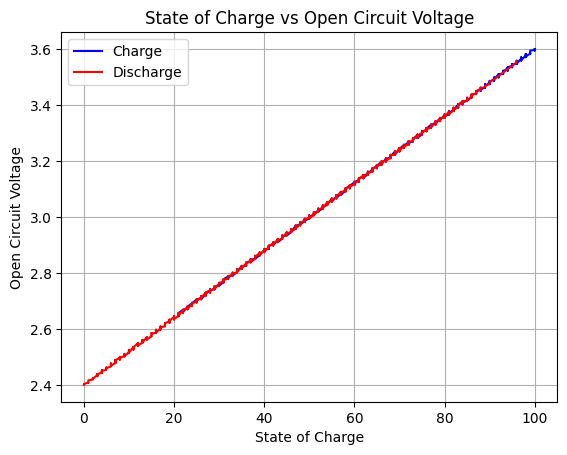

In [34]:
# Filter data for charge and discharge cycles
charge_data = df[df['Current(A)'] > 0]
discharge_data = df[df['Current(A)'] < 0]

# Plot charge cycle
plt.plot(charge_data['SOC'], charge_data['OCV'], label='Charge', color='blue')

# Plot discharge cycle
plt.plot(discharge_data['SOC'], discharge_data['OCV'], label='Discharge', color='red')

plt.title('State of Charge vs Open Circuit Voltage')
plt.xlabel('State of Charge')
plt.ylabel('Open Circuit Voltage')
plt.legend()
plt.grid(True)
plt.show()

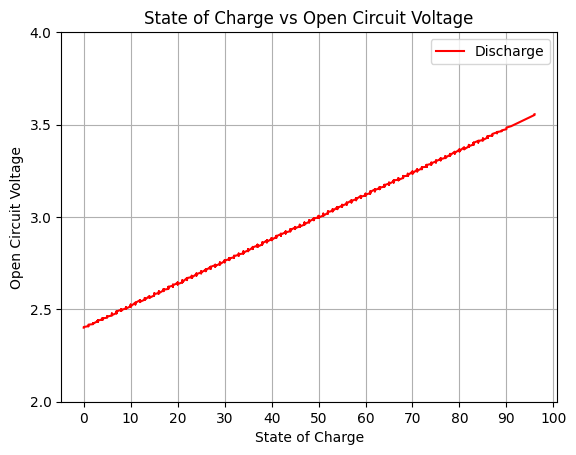

In [38]:
plt.plot(charge_data['SOC'], charge_data['OCV'], label='Charge', color='blue')
plt.plot(discharge_data['SOC'], discharge_data['OCV'], label='Discharge', color='red')
#plt.plot([0,10,25,50,75,90,100],[2.4,2.7,2.85,3,3.15,3.3,3.6],color='black')
plt.title('State of Charge vs Open Circuit Voltage')
plt.xlabel('State of Charge')
plt.ylabel('Open Circuit Voltage')
plt.legend()
plt.grid(True)
plt.xticks([0,10,20,30,40,50,60,70,80,90,100])
plt.yticks([2, 2.5, 3, 3.5, 4])
plt.show()

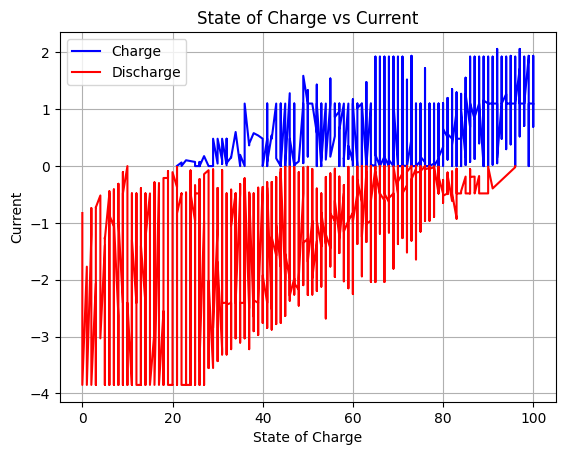

In [21]:
# Filter data for charge and discharge cycles
charge_data = df[df['Current(A)'] > 0]
discharge_data = df[df['Current(A)'] < 0]

# Plot charge cycle
plt.plot(charge_data['SOC'], charge_data['Current(A)'], label='Charge', color='blue')

# Plot discharge cycle
plt.plot(discharge_data['SOC'],discharge_data['Current(A)'],  label='Discharge', color='red')

plt.title('State of Charge vs Current')
plt.xlabel('State of Charge')
plt.ylabel('Current')
plt.legend()
plt.grid(True)
plt.show()

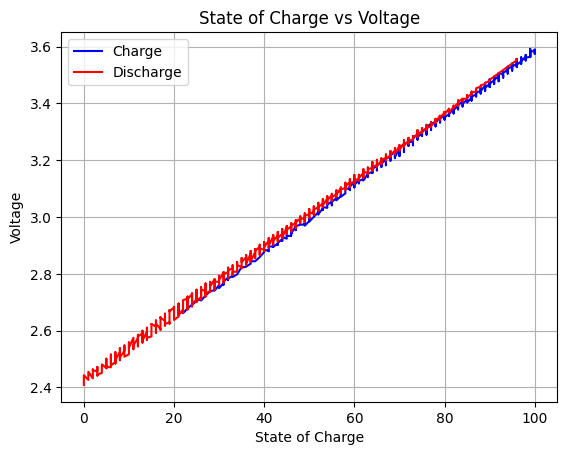

In [26]:
# Filter data for charge and discharge cycles
charge_data = df[df['Current(A)'] > 0]
discharge_data = df[df['Current(A)'] < 0]

# Plot charge cycle
plt.plot( charge_data['SOC'],charge_data['Voltage(V)'], label='Charge', color='blue')

# Plot discharge cycle
plt.plot( discharge_data['SOC'], discharge_data['Voltage(V)'],label='Discharge', color='red')

plt.title('State of Charge vs Voltage')
plt.xlabel('State of Charge')
plt.ylabel('Voltage')
plt.legend()
plt.grid(True)
plt.show()